<a href="https://colab.research.google.com/github/horasan/ml/blob/main/me_1_regression_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math

# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/winequalityN.csv")
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# is there any null (missing) values??
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# lets remove all the rows with missing data (# of the rows are relatively small)
#wine_data.shape[0]
wine_data = wine_data.dropna()
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_data
# rename the column names for the meaningful ones.
wine_data.rename(columns={"type": "white_wine"}, inplace=True)
#type(wine_data)
#wine_data["type"].unique()
wine_data.white_wine.unique()


<ipython-input-6-a90d70c273f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.rename(columns={"type": "white_wine"}, inplace=True)


array(['white', 'red'], dtype=object)

In [ ]:
wine_data.loc[wine_data["white_wine"] == "white", "white_wine"] = 1
wine_data.loc[wine_data["white_wine"] == "red", "white_wine"] = 0
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


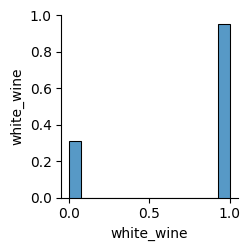

In [ ]:
# todo: white_wine kolonuna gore distrubution cizdir!

#wine_data["white_wine"].to_frame()
sns.pairplot(wine_data["white_wine"].to_frame())

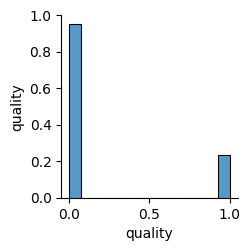

In [ ]:
# lets convert the quality column to good/not good
wine_data.loc[wine_data["quality"] <= 6, "quality"] = 0
wine_data.loc[wine_data["quality"] > 6, "quality"] = 1
#sns.pairplot(wine_data["quality"].to_frame())
#wine_data.quality.unique()
sns.pairplot(wine_data["quality"].to_frame())
# most of them are not good!

Normalize the data

In [ ]:
# ct : column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid",
     "residual sugar", "chlorides", "free sulfur dioxide",
     "total sulfur dioxide", "density", "pH", "sulphates",
     "alcohol"]), # Normalize these columns
)

In [ ]:
# features and labels(true values)
# X: multiple features so that capital X
# y: single output so that lower y

X = wine_data.drop("quality", axis=1) # features
y = wine_data["quality"] # true values
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Train test data

In [ ]:
# training data (80%) & testing (20%) of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# transform normalize the data

In [ ]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal

array([[0.21487603, 0.11333333, 0.22289157, ..., 0.34645669, 0.1011236 ,
        0.44927536],
       [0.23966942, 0.12666667, 0.18674699, ..., 0.40944882, 0.19101124,
        0.23188406],
       [0.63636364, 0.15333333, 0.30722892, ..., 0.22834646, 0.3988764 ,
        0.26086957],
       ...,
       [0.27272727, 0.12      , 0.20481928, ..., 0.25984252, 0.1741573 ,
        0.15942029],
       [0.18181818, 0.08      , 0.14457831, ..., 0.4488189 , 0.14044944,
        0.50724638],
       [0.30578512, 0.07333333, 0.20481928, ..., 0.28346457, 0.15168539,
        0.44927536]])

Build the model. here deep learning layes.

In [ ]:
model_1 = tf.keras.Sequential()


# add the layer, here 3 layers (4, 4, 4, 1)
model_1.add(tf.keras.layers.Dense(4, activation = tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(4, activation = "relu"))
#model_1.add(Dense(4, activation = "relu"))
model_1.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))
# loss="mse": mean square error
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']) # check the documentation

deep learning network (model) is ready!

In [ ]:
# start learning
history = model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 4s 7ms/step - loss: 0.6454 - accuracy: 0.7720
Epoch 2/100
162/162 [==============================] - 1s 7ms/step - loss: 0.5293 - accuracy: 0.8056
Epoch 3/100
162/162 [==============================] - 1s 6ms/step - loss: 0.4906 - accuracy: 0.8056
Epoch 4/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4859 - accuracy: 0.8056
Epoch 5/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.8056
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4784 - accuracy: 0.8056
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.8056
Epoch 8/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4687 - accuracy: 0.8056
Epoch 9/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4629 - accuracy: 0.8056
Epoch 10/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4562 - accura

model is trained.
Now lets avaluate

In [ ]:
model_1.evaluate(X_test_normal, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.7951


[0.4064243733882904, 0.7950502634048462]

<Axes: >

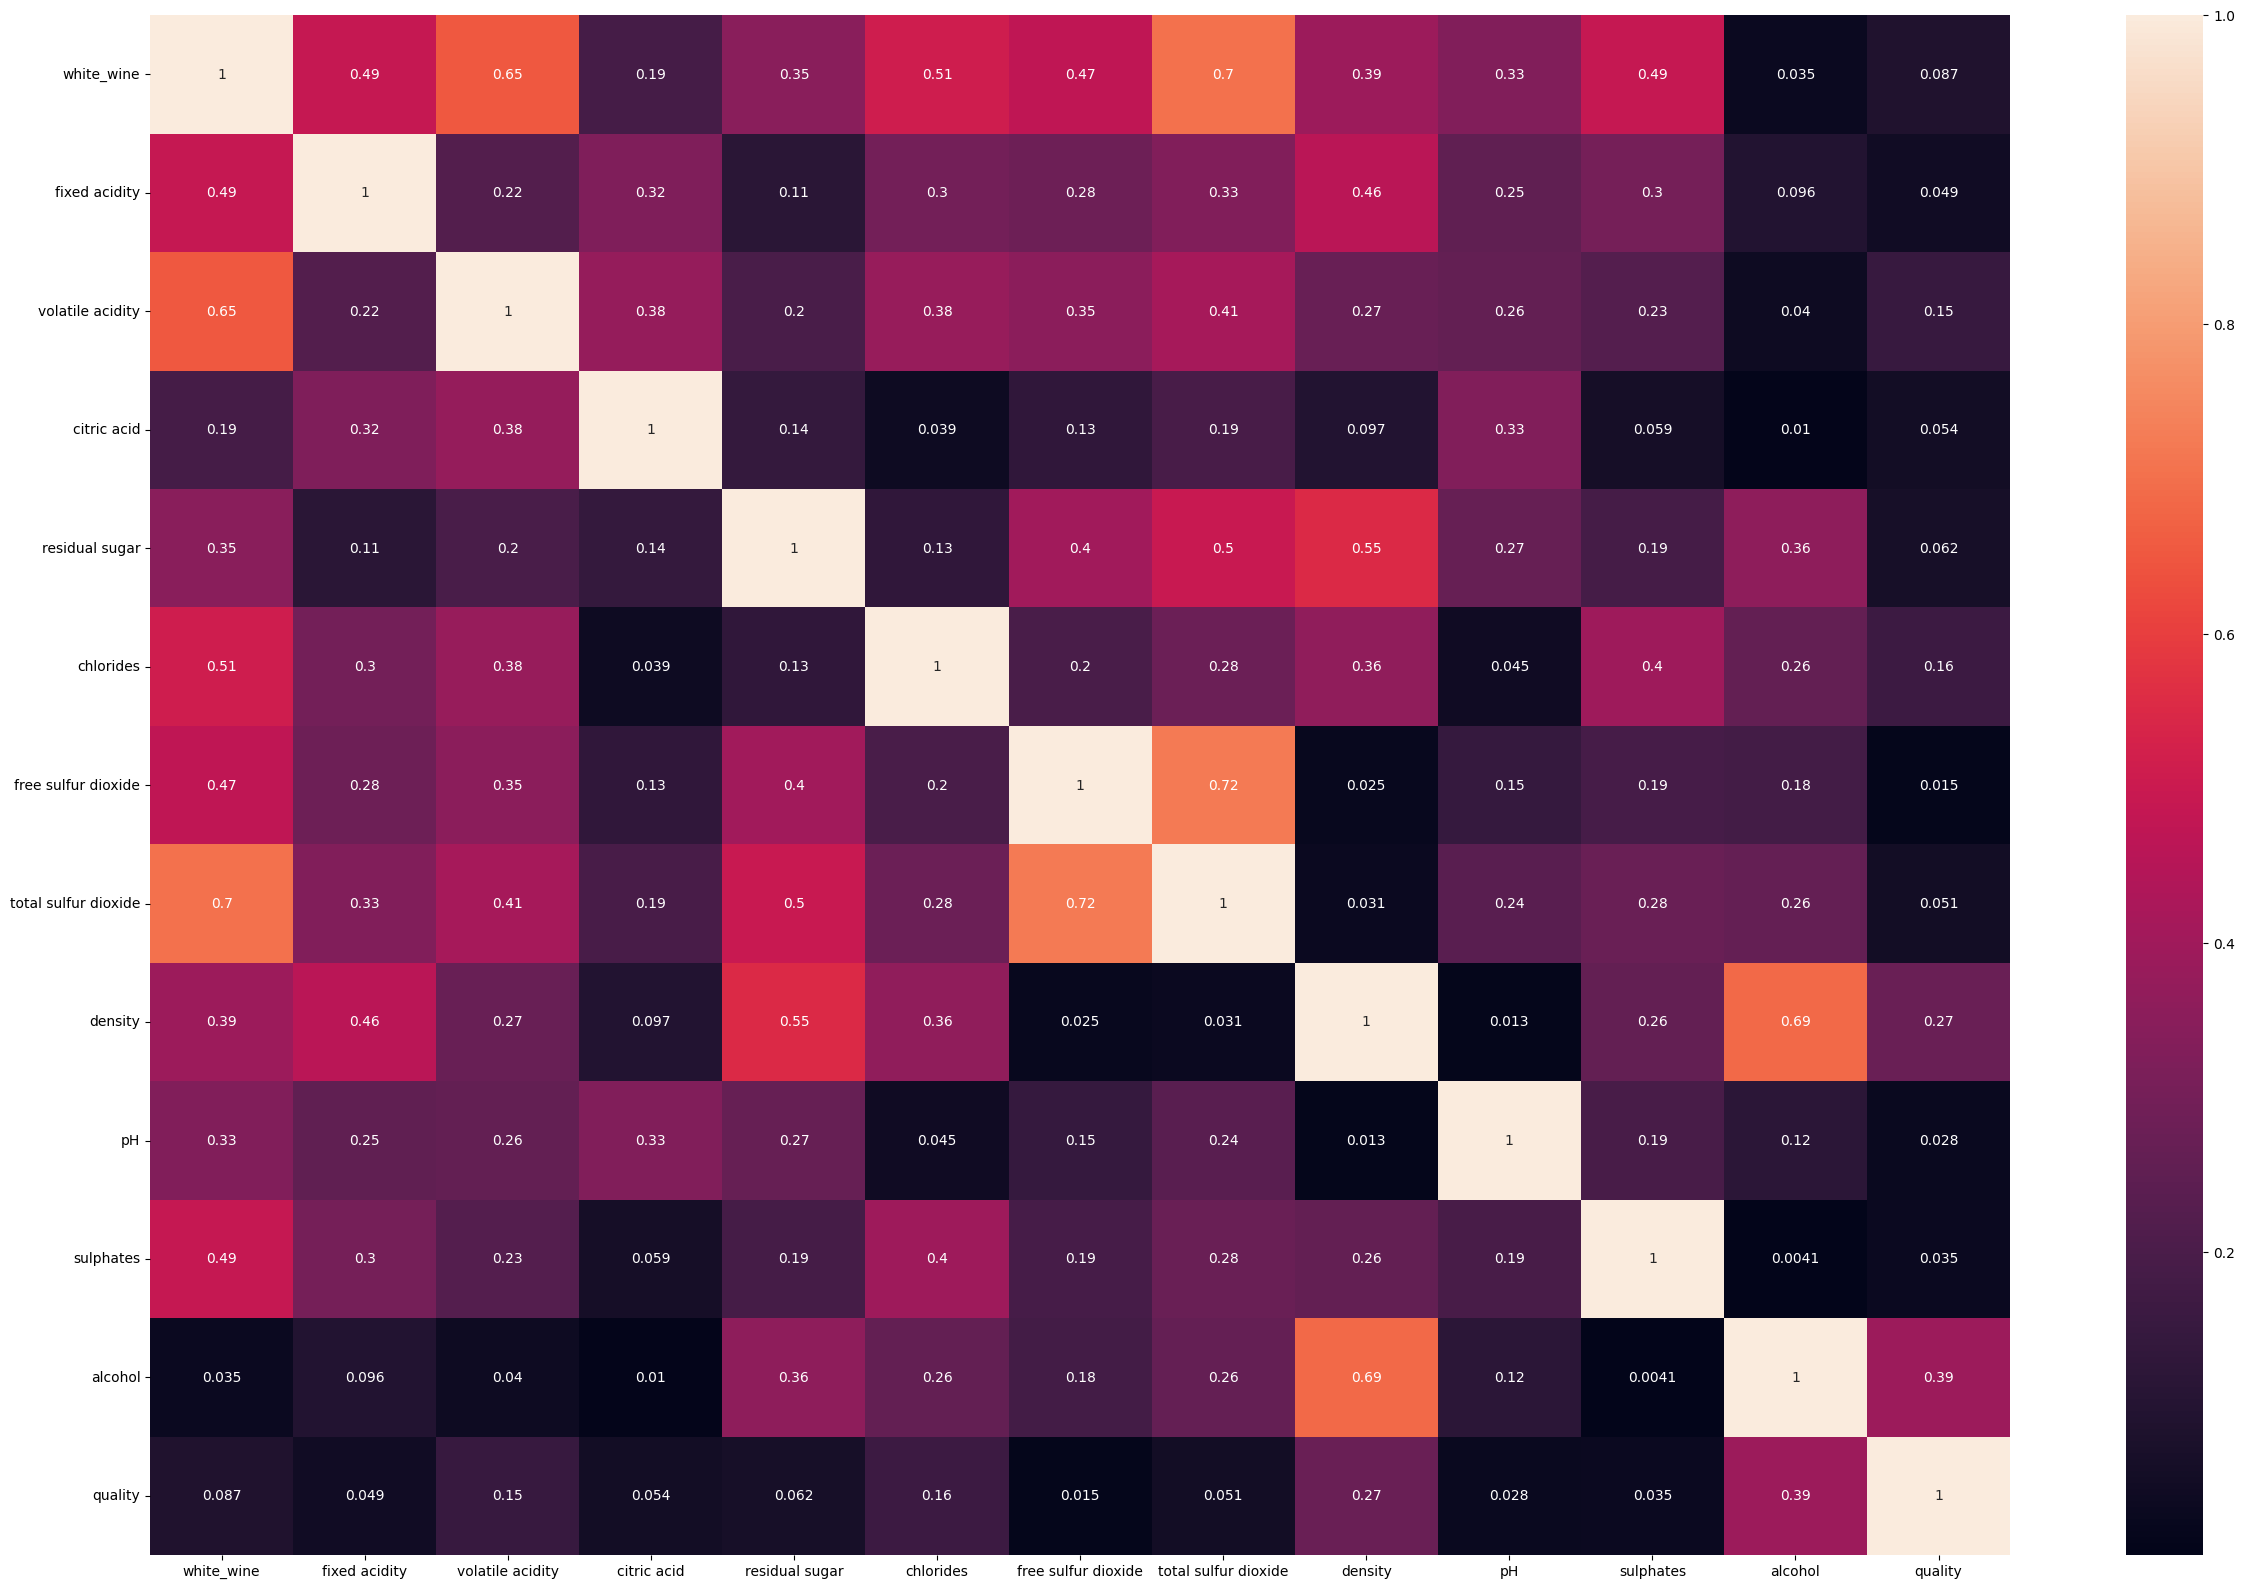

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(wine_data.corr().abs(),  annot=True)

Text(0.5, 1.0, 'Model 1 Loss Curve')

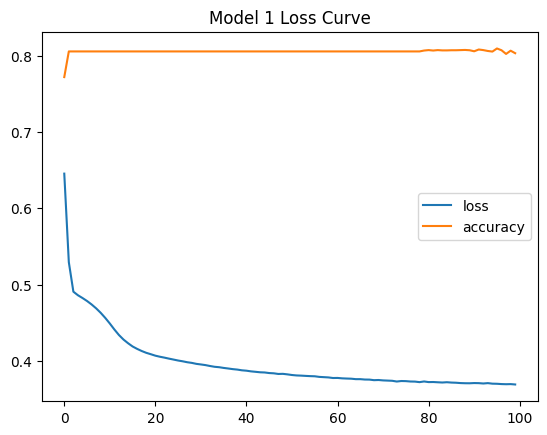

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 Loss Curve")
# loss and accuracy

understanding the Model

In [ ]:
from tensorflow.keras.utils import plot_model

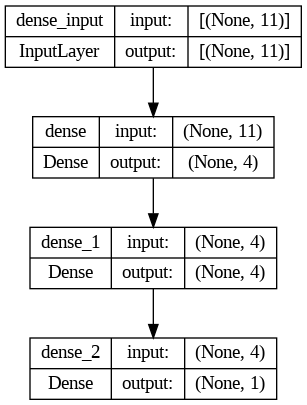

In [ ]:
plot_model(model_1, show_shapes=True)

In [ ]:
# Get Weight values & size
weights, biases = model_1.layers[1].get_weights()
weights, weights.shape

(array([[-6.8955547e-01, -7.1235561e-01,  7.3386288e-01,  5.3256869e-01],
        [-6.4252633e-01,  4.2059788e-01,  6.9990009e-01, -7.5855350e-01],
        [-3.2585995e+00, -1.9503409e+00,  3.5814759e-01, -1.8881338e-03],
        [ 2.0450761e+00,  1.0614330e+00, -6.0945565e-01, -4.5057231e-01]],
       dtype=float32),
 (4, 4))

In [ ]:
# Bias values & size
biases, biases.shape

(array([-0.00483412,  0.02362765, -0.08871701, -0.01320057], dtype=float32),
 (4,))